### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###

# A Project About Nothing: The Seinfeld Bottle Deposit Problem
#### Sophie Stephenson (srstephenso2@wisc.edu), Jon Van Veen (jvanveen@wisc.edu), and Sowmya Vemparala (svemparala@wisc.edu)
*Title is a reference to the canonical description of Seinfeld: a show about nothing.*

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

In Season 7, Episodes 21 & 22 of Seinfeld, the characters Kramer and Newman hatch a scheme to profit from recycling bottles in Michigan for 10 cents per bottle. They live in New York City, so the cost of gas and renting a truck previously meant it was not worth the drive to recycle the bottles. However, in these two episodes, they are able to use a truck for free and decide this is the opportunity to make a profit recycling hundreds of bottles. The [Episode 21](https://www.seinfeldscripts.com/TheBottleDeposit1.html) & [Episode 22](https://www.seinfeldscripts.com/TheBottleDeposit2.html) scripts are linked here for reference. 

In our project, we will investigate this “bottle deposit” problem and evaluate whether we could make a profit recycling bottles. We will consider not only Michigan, but also seven other states where we could recycle the bottles. We will vary factors like the number of cars/trucks available, the the price of gas, the maximum cost we are willing to pay, and the potential cost of legal punishment (since this scheme is technically illegal). Our problem is represented in the following diagram.







[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg
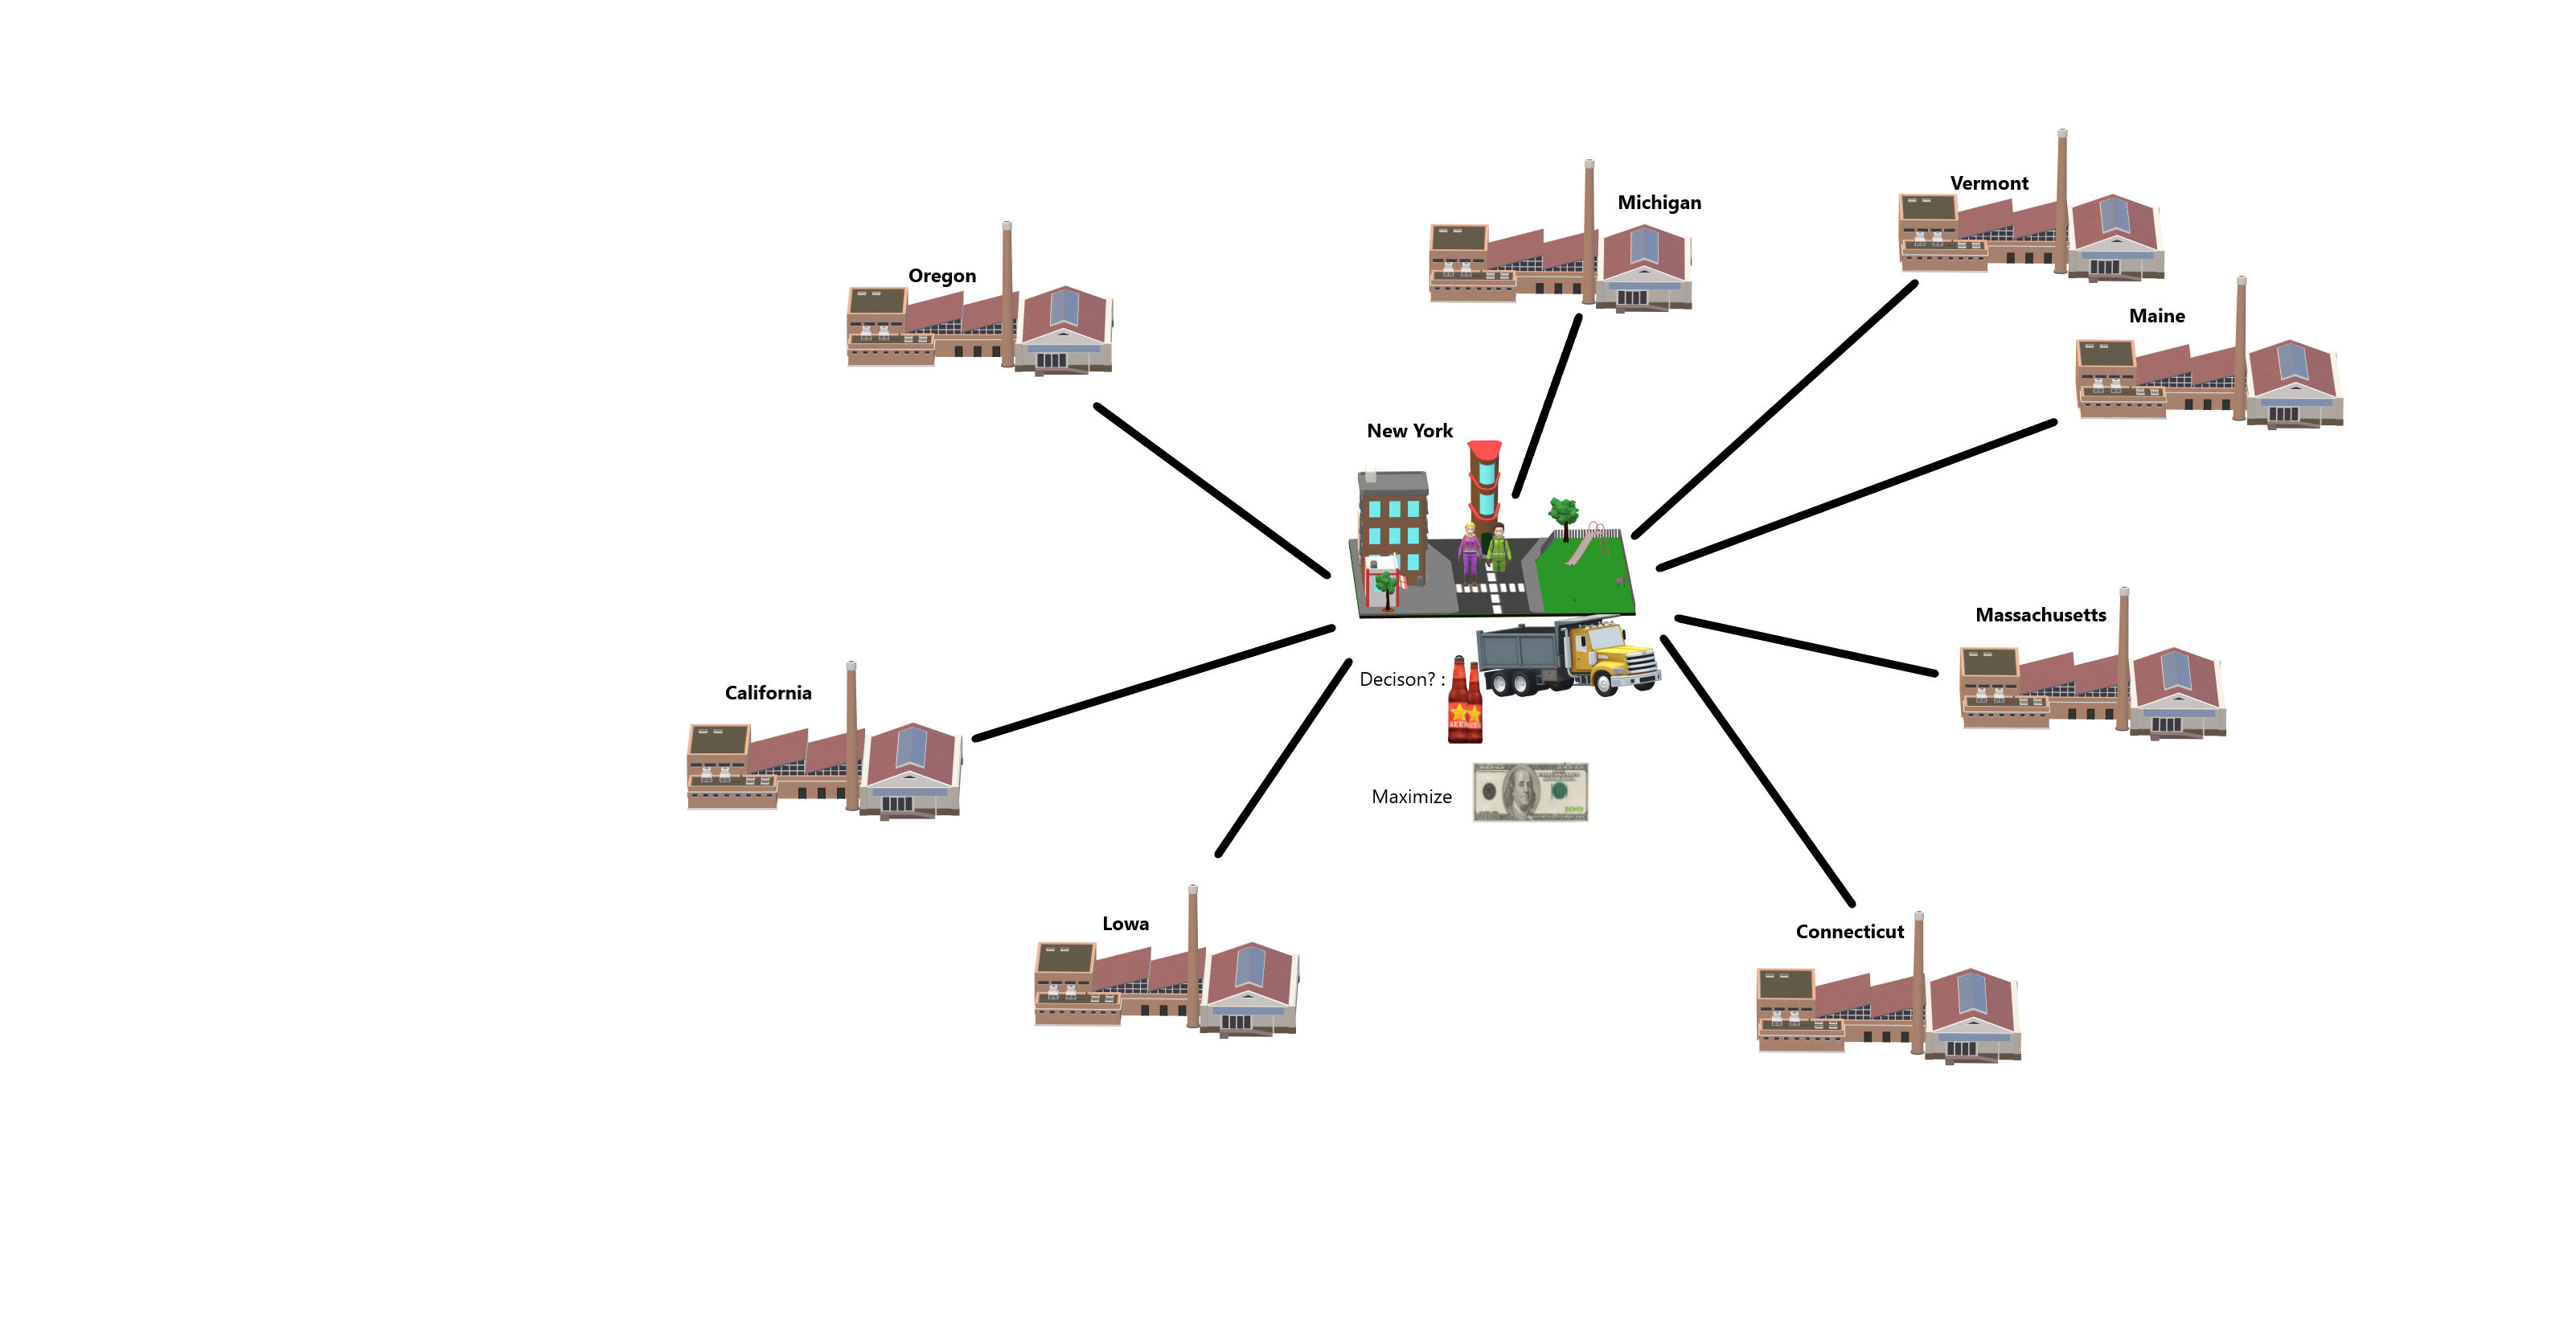

## 2. Mathematical Model

### 2.A. Data & Assumptions

We will make some assumptions in order to solve this problem.

#### 2.A.a. Recycling Locations 

There are 10 states which have bottle bills; we will only consider the 9 which are driveable from New York (i.e., not Hawaii), and we will ignore New York itself. We will also only consider one recycling location per state, the one closest to New York. The eight locations are shown in the table below.

One recycling location cannot handle infinite bottles being recycled at once. Therefore, we assume each recycling location has a capacity which we cannot exceed. We found that in California, you can recycle up to 100 pounds of aluminum and plastic and up to 1,000 pounds of glass ([source](https://calrecycle.ca.gov/bevcontainer/consumers/important/#:~:text=Effective%20January%201%2C%202014%20the,than%20the%20new%20daily%20limits)). For simplicity (and because we could not find specific limits for all other locations), we will consider this limit for all locations.

#### 2.A.b. Deposit Values & Bottle Types

Each state has a designated deposit value, or the payment someone will receive for recycling one bottle. However, some states have *two* possible deposit values depending on the type of bottle (e.g., in some states, larger bottles can earn more). See [here](https://newsroom.tomra.com/bottle-bill-states/) for more details. We will therefore say that each state has two deposit values; if, in reality, a state only has one possible deposit value, we will represent this by setting the second deposit value to 0¢.

**Representative Bottles**

Many types of bottles can yield a deposit value in a state. For example, in Massachussets, you can earn 5 cents for recycling a beer bottle, soda bottle, or mineral water bottle. It would be quite complex for us to consider each possible type of bottle that could be recycled for that price, especially in states that accept nearly every type of bottle. Therefore, we simplify by choosing to consider only one representative type of bottle for each deposit value. In fact, we consider only two types of bottles: a 16.9oz plastic bottle, often for soda or water, and a 750ml liqour bottle. The following table describes the representative bottles we chose for each state and deposit value.

| State | Deposit Value | Bottle Types | Representative Bottle |
| --- | --- | --- | --- |
| California | 5¢ | Anything non-alcoholic, beer, wine coolers, distilled spirits coolers | 16.9oz, plastic  |
| California | 10¢ | Any of the above $\geq$ 24 oz| 750ml, glass  |
| Connecticut | 5¢ | Beer, soda, sparkling water, bottled water, flavored water | 16.9oz, plastic  |
| Iowa | 5¢ | Beer, soda, mineral water, wine coolers, wine, liquor | 16.9oz, plastic  |
| Maine | 5¢ | Anything except dairy and unprocessed cider | 16.9oz, plastic |
| Maine | 15¢ | Wine & Liquor > 50mL | 750ml, glass |
| Massachusetts | 5¢ | Beer, soda, mineral water | 16.9oz, plastic  |
| Michigan | 10¢ | Beer, soda, mineral water, kombucha, wine coolers, distilled spirits coolers | 16.9oz, plastic  | 
| Oregon | 10¢ | Anything except liquor, milks, and infant formula | 16.9oz, plastic |
| Vermont | 5¢ | Beer, soda, mineral water, wine coolers | 16.9oz, plastic |
| Vermont | 15¢ | Liquor bottles | 750ml, glass | 


With this simplification, our choice is how many of each representative type of bottle to recycle in our chosen state. The deposit value of each representative type of bottle can be represented compactly as follows. Also included is the closest recycling center in each state, and the corresponding driving distance and time from New York City.

| State | 16.9oz plastic | 750ml glass | Recycling Center | Distance (mi) | Driving time (hrs) |
| -- | --: | --: | --: | --: | --: |
| California | 5¢ | 10¢ | 2160 E Main St, Barstow, CA 92311 | 2662 | 40 |
| Connecticut | 5¢ | 0¢ | 130 Magee Ave, Stamford, CT 06902 | 40.6 | 0.85 |
| Iowa | 5¢ | 0¢ | 2844 W 72nd St, Davenport, IA 52806 | 947 | 14.73 |
| Maine | 5¢ | 15¢ | 468 Dow Hwy, Eliot, ME 03903 | 272 | 4.52 |
| Massachusetts | 5¢ | 0¢ | 84 Birnie Ave, Springfield, MA 01107 | 143 |  2.47 |
| Michigan | 10¢ | 0¢ | 307 River St, Adrian, MI 49221 | 608 |9.55 |
| Oregon | 10¢ | 0¢ | 415 OR-11, Pendleton, OR 97801 | 2684 | 40 |
| Vermont | 5¢ | 15¢ | 7446 US-5, Westminster, VT 05158 | 222 | 3.72 |

**Weight & Volume**

This simplification also allows us to easily calculate the volume and weight of each bottle. We need this calculation to determine how many bottles can fit in the available cars, as well as the impact on gas mileage. To approximate the volume of each bottle, we create a rectangular prism around the bottle using its diameter and its height. (We do this because we care more about the space the bottle takes up, rather than the internal volume.)


| Bottle | Weight | Volume |
| -- | --: | --: |
| 16.9oz plastic | [0.67 oz](https://www.wastecare.com/usefulinfo/PET-Plastic-Water-Soda-Bottles-Bale-Weights.htm) | 2.5" x 2.5" x 8" = [50 cubic inches](https://www.dimensions.com/element/soda-bottle-16-9-oz) | 
| 750ml glass | [17.64 oz](https://coastalwinetrail.com/how-much-does-a-bottle-of-wine-weigh/) | 2.95" x 2.95" x 11.8" = [102.69 cubic inches](https://www.dimensions.com/element/wine-bottle-750-ml-standard#:~:text=The%20Wine%20Bottle%20(750%20mL,25.4%20oz%20(750%20mL))|

#### 2.A.c. Transportation

**Existing Cars**

Assume that we have a set number of cars available for free. In the episode, Kramer has a single car: a [1973 Chevrolet Impala](https://www.motortrend.com/vehicle-genres/kramer-seinfeld-1973-chevrolet-impala-airbags-details-photos/). We assume this is the car we have available for this problem. For ease of finding specifications, we will use a more recent version, a 2019 Chevrolet Impala.

The car has a set volume of trunk and passenger space. The volume of the bottles we want to recycle cannot exceed this volume, or they will not fit in the car. For simplicity, we do not consider the shape or arrangement of the bottles; if the total volume of the bottles is less than the total volume of the cars, we assume that the bottles can be arranged to fit in that space. 

> Note: Given multiple vehicles, we will split the amount of bottles proportionally among the cars. For example, say we have 100 bottles and two cars, where Car 1 has twice the space of Car 2. Then, we will put 67 bottles in Car 1 and 33 bottles in Car 2. This will factor into the MPG calculation in our final model.

**Cost of Rentals**

For more space, we can rent a [9' U-Haul Cargo Van](https://www.uhaul.com/Truck-Rentals/Cargo-Van/). These U-Hauls have a base price to rent and an additional a price per mile. We can rent as many U-Hauls as we want, but we only have a set number of drivers who want to participate. If we want to drive more cars than the number of drivers, we need to hire a driver for every extra car.

According to [this source](https://www.move.org/uhaul-review/#U_Haul_prices), if the distance traveled is less than 100 miles, the price of a U-Haul is \$38 plus an additional $0.99/mile. The price is different if the distance is greater than 100 miles, but we will ignore this in our problem to make things simpler.

The cost of rentals, therefore, can be represented as follows. Assume $U$ is then number of U-Hauls we choose to rent.

$$\begin{aligned} \text{cost of U-Hauls } &= U \times \big(\text{base rental price} + (\text{miles traveled} \times \text{cost per mile}) \big) \\
\text{cost of drivers } &= \big((\text{existing cars} + U) - \text{existing drivers}\big) \times \text{hours driving} \times \text{cost per hour}\end{aligned}$$

We will consider the driver service as $25/hour, as referred in [this source](https://www.dryver.com/prices-and-services.html).


**Cost of Gas**

An important factor of the problem is the cost of gas. We are considering only the nearest recycling location within each state, so we can easily calculate the number of miles we need to drive to each location. With no bottles in the car, we can then easily calculate the cost of gas as follows:

$$\text{cost of gas } = \frac{\text{distance in miles}}{\text{miles per gallon}} \times \text{gas price per gallon}$$

The MPG of the car does depend on the weight inside. However, according to [this source](https://www.fueleconomy.gov/feg/driveHabits.jsp), with every 100 pounds added to the vehicle, the gas mileage is reduced by 0.1%. This means that with our decided weight limits (100 pounds plastic, 1,000 pounds glass), we will lose a maximum of 1.1% of our gas mileage. Because this is a negligible amount (and because factoring in this amount makes our model unsightly), we will therefore ignore the impact of the bottle weight on the gas price.

We will use the average national cost of gas in our problem. On April 19, 2022, that average was $4.101 according to [this source](https://gasprices.aaa.com/).

### 2.B. Our Mathematical Model, In Words ###

With these assumptions in mind, we can model this problem as follows.

1. We have four **decision variables**: (1) the location where we will recycle bottles, (2) the number of bottles of each representative type to recycle at each location, (3) the number of UHauls to rent, and (4) the number of drivers to hire.

2. The **objective** is to maximize profit (revenue minus cost). Our revenue is the total deposit value of all bottles we choose to recycle. Our costs are the costs of rentals and gas, as described above. 

3. The **constraints** are as follows:
  - We can only recycle at a single location.
  - We can only recycle bottles at our chosen location; i.e., if we haven't chosen a location, the number of bottles we recycle at that location cannot be more than zero.
  - The weight of the bottles we are recycling cannot exceed the weight limits.
  - The total volume of the bottles we are carrying cannot exceed the total volume of the cars we have available (including any rented U-Hauls). 
  - We cannot exceed our maximum cost of gas and rentals.
  - The number of drivers we hire should be zero until we have more cars than drivers; then, it should be equal to the number of cars minus the number of existing drivers.

### 2.C. Writing the Model Mathematically

To solve this problem, we will use the following mathematical model. We represent our decision variables as follows:

| Decision Variable | Type | Description |
| --: | -- | -- |
| $\Psi_j$ | Binary | Whether to recycle at state $j$ ($1 \leq j \leq 8$). | 
| $X_{ij}$ | Integer | The number of bottles of type $i$ to recycle at location $j$ ($1 \leq i \leq 2$, $1 \leq j \leq 8$). |  
| $U$ | Integer | The number of U-Hauls to rent. | 
| $D$ | Integer | The number of drivers to hire. |


Then, we can represent our parameters as shown below.

| Parameter | Description | Unit | Value | 
| --: | -- | -- | -- |
| $\rho_{ij}$ | The deposit value of bottle type $i$ in state $j$. | dollars | $\begin{bmatrix} 0.05&0.05&0.05&0.05&0.05&0.10&0.10&0.05 \\ 0.10&0.00&0.00&0.15&0.00&0.00&0.00&0.15\end{bmatrix}$ |
| $\nu_{i} $  | The volume (simplified to a rectangular prism) of bottle type $i$.| inches$^3$ | $\begin{bmatrix}50.00 & 102.69\end{bmatrix}$ |
| $w_{i}$  | The weight of bottle type $i$. | oz | $\begin{bmatrix}0.67 & 17.65\end{bmatrix}$ |
| $\lambda_i$ | The weight limit for bottles of type $i$ at any location. | oz | $\begin{bmatrix}1600 & 16000 \end{bmatrix}$|
| $\delta_j$  | The distance we have to travel to recycle at state $j$ (one-way).| miles | \begin{bmatrix} 2662 & 40.6 & 947 & 272 & 143 & 608 & 2684 & 222\end{bmatrix} |
| $\phi_j$ | The time it takes to get to state $j$ (one-way). | hours | $\begin{bmatrix}40 & 0.85 & 14.73 & 4.52 & 2.47 & 9.55 & 40 & 3.72 \end{bmatrix}$ |
| $C_{Max}$ | The maximum we are willing to spend before we get the profit from recycling. | dollars | 1000 |
| $g$  | The cost of gas, per gallon. | dollars | 4.101 |
| $c$  | The number of cars we have available to use for free. | cars | 1 |
| $m_c$ | The MPG of our existing car. | miles/gallon| 25 |
| $v_c$  | The volume of our existing car. | inches$^3$| 213,926.4 |
| $m_{u}$  | The MPG of a U-Haul 9' Cargo Van.  | miles/gallon | 18 |
| $v_{u}$ | The volume of a U-Haul 9' Cargo Van. | inches$^3$| 425,088  |
| $r_1$  | The base cost to rent a U-Haul 9' Cargo Van. | dollars |38.00  |
| $r_2$  | The cost per mile for a U-Haul 9' Cargo Van. | dollars |0.99  |
| $d$  | The number of drivers we have available. | people | 2 |
| $h$  | The cost to rent a driver for one hour. | dollars | 25.00 |
| $M_1$ | An upper bound on $X_{1j}$. | bottles | 2,388 (100lb of bottles) |
| $M_2$ | An upper bound on $X_{2j}$. | bottles | 906 (1,000lb of bottles)|



Then, our problem is as follows (using the constraints defined in the above section):

$$
\begin{aligned}
\underset{\Psi_j, X_{ij}, U, D}{\text{maximize}} \qquad& revenue - rentals - gas\\
\text{where} \qquad 
& revenue := \sum_{j=1}^8 \big(X_{1j} \rho_{1j} + X_{2j} \rho_{2j}\big) \\
& rentals := \sum_{j=1}^8 \Psi_j \bigg(U(r_{1} + 2\delta_jr_{2}) 
+ 2D\phi_j h\bigg) \\
& gas := \sum_{j=1}^8 \Psi_j \big( c\frac{\delta_jg}{m_c} + U\frac{\delta_jg}{m_U}\big)\\
\text{subject to:}\qquad 
& \sum_{j=1}^8 \Psi_j = 1\\
& rentals + gas \leq C_{Max} & \text{(cost before recycling)}\\ 
& w_i X_{ij} \leq \lambda_j \qquad \forall i,j & \text{(capacity limits)}\\
& X_{ij} \leq M_i\Psi_j \qquad \forall i,j & \text{(logic constraints on X)}\\
& \nu_1 X_{1j} + \nu_2 X_{2j} \leq cv_c + U v_{u} \qquad \forall j & \text{(volume constraints)}\\
& D \geq (c + U - d)& \text{(logic constraints on number of drivers)}\\
& \Psi_j \in \{0, 1\} \qquad  \forall j & \text{($\Psi$ is binary)}\\
&X_{ij} \in \mathbb{N} \qquad \forall i,j & \text{(recycle natural number of bottles)}\\
&U,D \in \mathbb{N} & \text{(rent a natural number of UHauls and drivers)}\\
\end{aligned}
$$

## 3. Solution #

We now code our model and show the solution. In Section 4, we provide additional analysis on the effect of changing several parameters, like the cost of gas.

First, we define the variables as we showed in the table above.

In [ ]:
ρ = [0.05 0.05 0.05 0.05 0.05 0.10 0.10 0.05; # values in different states (dollars)
     0.10 0.05 0.05 0.15 0.05 0.10 0.10 0.15]
ν = [50.00 102.69] # volumes (in^3)
w = [0.67 102.69]  # weights (oz)
λ = [1600 16000]   # weight limit (oz)

δ = [2662 40.6 947 272 143 608 2684 222]   # distance to locations (miles)
ϕ = [40 0.85 14.73 4.52 2.47 9.55 40 3.72] # time to locations (hours)

C_Max = 1000 # max cost (dollars)
g = 4.101    # cost of gas (dollars)

c = 1          # num existing cars
m_c = 25       # gas mileage of existing car
v_c = 213926.4 # volume of existing car in in^3

m_u = 18     # gas mileage of UHaul
v_u = 425088 # volume of UHaul in in^3
r_1 = 38     # base price
r_2 = 0.99   # price per mile

d = 2        # num drivers
h = 25       # price to rent driver per hour

M = [2388 906] # capacity limits
;

Then, we can implement the model in code.

In [ ]:
# Then, let's write the model.

using JuMP, Gurobi
const GUROBI_ENV = Gurobi.Env()

m = Model(with_optimizer(Gurobi.Optimizer,GUROBI_ENV,OutputFlag=0))

# Define our decision variables
@variable(m, Ψ[1:8], Bin)      # whether to recycle in each state
@variable(m, X[1:2, 1:8] >= 0, Int) # the number of bottles to recycle in each state
@variable(m, U >= 0, Int)           # the number of UHauls to buy
@variable(m, D >= 0, Int)     # the number of drivers to hire

# We tried our model first without making X, U, or D have to be integers.

# Define expressions as above
@expression(m, revenue, sum(X[1,j]ρ[1,j] + X[2,j]ρ[2,j] for j in 1:8))
@expression(m, rentals, sum( Ψ[j] * (U * (r_1 + 2δ[j] * r_2) + D * 2ϕ[j] * h) for j in 1:8 ))
@expression(m, gas, sum( Ψ[j] * ( ((c * δ[j] * g) / m_c ) + ((U * δ[j] * g) / m_u )) for j in 1:8 ))

# Constraints
@constraint(m, rentals + gas <= C_Max)         # max cost constraint
@constraint(m, sum( Ψ[j] for j in 1:8 ) == 1) # can only select one location

# The number of drivers should be zero, unless we are required to hire.
# Then we need to hire enough drivers to close the gap between the number
#   of cars and the number of people available to drive them.
@constraint(m, D >= c + U - d)

for j in 1:8
    for i in 1:2
        @constraint(m, w[i]X[i,j] <= λ[i]) # weight limits
        @constraint(m, X[i,j] <= M[i]Ψ[j]) # don't recycle somewhere unless we chose that location
    end
    @constraint(m, ν[1]X[1,j] + ν[2]X[2,j] <= c * v_c + U * v_u) # volume limits - have to convert to ft3
end

# And finally, our objective
@objective(m, Max, revenue - rentals - gas)

# Optimize it!
optimize!(m)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-05-14


Finally, we can print the result!

In [ ]:
# This function derives the recycling state from our X decision variable, 
# to make printing prettier.
#
function extract_recycling_data(X)
    states = ["California" "Connecticut" "Iowa" "Maine" "Massachusetts" "Michigan" "Oregon" "Vermont"]
    for i in 1:8
        if X[1,i] > 0
            state = states[i]
            bottles = X[1,i] + X[2,i]
            return Dict(:n => i, :state => state, :bottles => Int(round(bottles)))
        end
    end
    return Dict(:n => 0, :state => "No state", :bottles => 0)
end

# Now, print data!
data = extract_recycling_data(value.(X))
println("Recycle ", Int(data[:bottles]), " bottles in ", data[:state])
println("Rent ", Int(value(U))," Uhaul(s) and ", Int(value(D)), " drivers")
println("Total profit: \$", objective_value(m))

Recycle 2543 bottles in Michigan
Rent 0 Uhaul(s) and 0 drivers
Total profit: $154.56368000000003


Thus, using our simplified model, it *is* possible to make a profit recycling bottles! Our results show that we can recycle 2543 bottles in Michigan, using just our existing car, for a total profit of $154.56. This is a pretty exciting solution given that, in the Seinfeld story, the characters plan to recycle in Michigan, too.

## 4. Results & Analysis

Now, we want to analyze what would happen if we change some parameters of our problem instance.

### 4.A Defining a Customizable Model

Let's define a function that lets us input a varety of parameters we are interested in changing. The function takes in any changed parameters, builds the model, and returns some data about the state of the model at the optimal objective.

In [ ]:
# Define the model as a function where we can try different parameters
# and return the objective value

using JuMP, Gurobi

function test_parameters(;print=false, g=4.101, c=1, C_Max=1000, r_2=0.99, λ=[1600 16000], M=[2388 906], deposit_vals=ρ)
    m = Model(with_optimizer(Gurobi.Optimizer,GUROBI_ENV,OutputFlag=0))

    # Define our decision variables
    @variable(m, Ψ[1:8], Bin)      # whether to recycle in each state
    @variable(m, X[1:2, 1:8] >= 0, Int) # the number of bottles to recycle in each state
    @variable(m, U >= 0, Int)           # the number of UHauls to buy
    @variable(m, D >= 0, Int)     # the number of drivers to hire

    # We tried our model first without making X, U, or D have to be integers.

    # Define expressions as above
    @expression(m, revenue, sum(X[1,j]ρ[1,j] + X[2,j]ρ[2,j] for j in 1:8))
    @expression(m, rentals, sum( Ψ[j] * (U * (r_1 + 2δ[j] * r_2) + D * 2ϕ[j] * h) for j in 1:8 ))
    @expression(m, gas, sum( Ψ[j] * ( ((c * δ[j] * g) / m_c ) + ((U * δ[j] * g) / m_u )) for j in 1:8 ))

    # Constraints
    @constraint(m, rentals + gas <= C_Max)         # max cost constraint
    @constraint(m, sum( Ψ[j] for j in 1:8 ) == 1) # can only select one location

    # The number of drivers should be zero, unless we are required to hire.
    # Then we need to hire enough drivers to close the gap between the number
    #   of cars and the number of people available to drive them.
    @constraint(m, D >= c + U - d)

    for j in 1:8
        for i in 1:2
            @constraint(m, w[i]X[i,j] <= λ[i]) # weight limits
            @constraint(m, X[i,j] <= M[i]Ψ[j]) # don't recycle somewhere unless we chose that location
        end
        @constraint(m, ν[1]X[1,j] + ν[2]X[2,j] <= c * v_c + U * v_u) # volume limits - have to convert to ft3
    end

    # And finally, our objective
    @objective(m, Max, revenue - rentals - gas)

    optimize!(m)
    data = extract_recycling_data(value.(X))
    
    if print
        println("Recycle ", data[:bottles], " bottles in ", data[:state])
        println("Rent ", Int(round(value(U)))," Uhaul(s) and ", Int(round(value(D))), " drivers")
        println()
        
    end
    
    return  Dict(:dist => δ[data[:n]], :obj => objective_value(m), :U => value(U), :D => value(D), :cost => value(rentals) + value(gas))
    
end



test_parameters (generic function with 1 method)

### 4.B Changing the Deposit Values
In our original problem, we recycle in Michigan because the deposit value for plastic is higher, at 10 cents per bottle. What happens if all of the states have the same deposit values?

In [ ]:
# set all deposit values to 10 cents
new_ρ = [0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10; 
     0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]

# test the new model and print details
data = test_parameters(print=true, deposit_vals=new_ρ)
println("total profit is \$", data[:obj])

Recycle 2543 bottles in Michigan
Rent 0 Uhaul(s) and 0 drivers

total profit is $154.56368000000003


When all deposit values are the same across states, we end up going to Connecticut instead! This makes sense; if we would get the same amount of income from recycling in Michigan vs Connecticut, it would certainly be more cost-effective to go to Connecticut, since it is much closer to New York.

### 4.C Changing capacity limits

We currently assume weight limits on our bottles: 1600oz of plastic and 16000oz of glass. What happens when we relax these limits?

In order to effectively reduce these limits, we also have to change our M value (our limits on the number of bottles we can recycle, which we used in our logic constraints). We will set the limit for both types of bottles to 1000000, just to be safe.

In [ ]:
# our original capacity for plastic bottles is 1600oz
capacity = 1600 

# We only need to keep track of the capacity for plastic bottles - 
# the capacity for glass bottles is simply 10 times that.

# set up places to store data
capacities = []
optimals = []
UHauls = []
Drivers = []
costs = []

# Keep increasing capacity by 100 until we reach 50,000oz for plastic bottles (500,000oz for glass)
while capacity <= 50000
    
    # build the model with our new parameters
    data = test_parameters(λ=[capacity capacity*10], M=[1000000 1000000]) # remove the limit as well
    
    # push data to lists
    push!(optimals, data[:obj])
    push!(UHauls, data[:U])
    push!(Drivers, data[:D])
    push!(capacities, capacity)
    push!(costs, data[:cost])
    
    # increment capacity
    capacity += 100
end

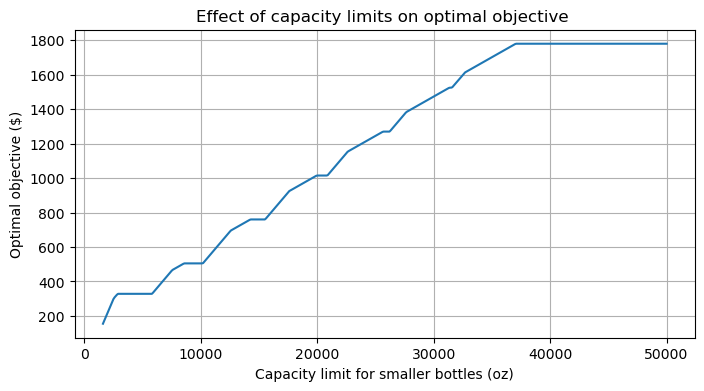

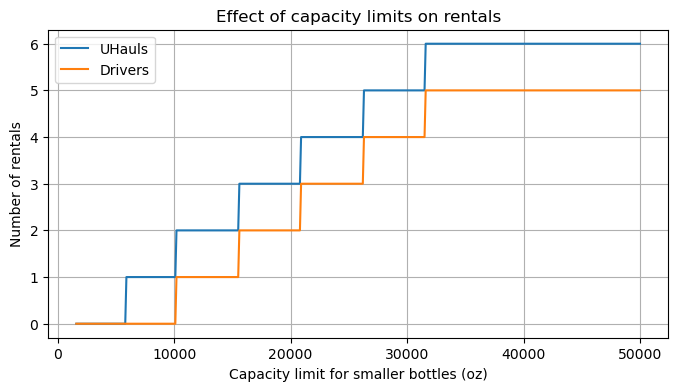

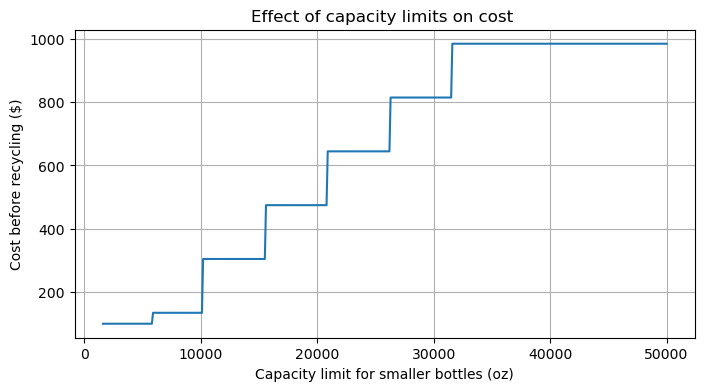

In [ ]:
# Plot our findings!

using PyPlot

figure(figsize=(8,4))
plot( capacities, optimals, "-" )
ylabel("Optimal objective (\$)")
xlabel("Capacity limit for smaller bottles (oz)");
title("Effect of capacity limits on optimal objective ")
grid()

figure(figsize=(8,4))
plot( capacities, UHauls, "-" )
plot( capacities, Drivers, "-" )
ylabel("Number of rentals")
xlabel("Capacity limit for smaller bottles (oz)");
title("Effect of capacity limits on rentals")
legend(["UHauls", "Drivers"])
grid()

figure(figsize=(8,4))
plot( capacities, costs, "-" )
ylabel("Cost before recycling (\$)")
xlabel("Capacity limit for smaller bottles (oz)");
title("Effect of capacity limits on cost ")
grid()

We can see that as we increase the capacity limit, we also get increased optimal objectives. This happens in a step-like fashion until we get to a plateau, which occurs when we have hit our maximum cost before recycling ($1000). If the capacity *and* max cost were removed, we may be able to recycle more and more bottles to get infinite profit. 

The way we are able to continue increasing profit as we go is by hiring more UHauls and drivers. As you can see in the second graph, the number of UHauls we hire (and as a result, the number of drivers we must hire) increases stepwise until we have hit the max cost. This allows us to keep recycling more bottles to take advantage of the looser capacity limits.

### 4.D Changing the Max Cost

Before, we saw that changing the capacity had a large effect on our profit. What happens if we change the max cost we are willing to pay before recycling?

In [ ]:
# Our original max cost before recycling
max = 1000

cmaxes = []
optimals = []

# Increment the max by 10 until we reach 10,000
while max <= 10000
    data = test_parameters(C_Max=max)
    push!(optimals, data[:obj])
    push!(cmaxes, max)
    max += 10
end

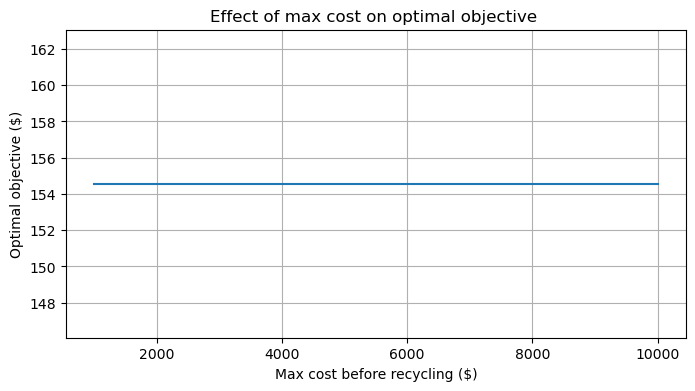

In [ ]:
# Plot results!
using PyPlot

figure(figsize=(8,4))
plot( cmaxes, optimals, "-" )
ylabel("Optimal objective (\$)")
xlabel("Max cost before recycling (\$)");
title("Effect of max cost on optimal objective ")
grid()

As we can see, unlike the capacity, the max cost is not a tight constraint. However, as we see in Section 4.A, it appeared to become a tight constraint when the capacity is much higher. Let's verify whether this is true.

In [ ]:
# Our original max cost before recycling
max = 1000

# Set the capacity to 100,000oz for plastic bottles (1,000,000oz for the glass bottles)
looser_capacity = 50000 * 2

cmaxes = []
optimals = []
UHauls = []
Drivers = []

# Increment the max by 10 until we reach 10,000
while max <= 5000
    data = test_parameters(C_Max=max, λ=[looser_capacity looser_capacity*10],M=[1000000 1000000])
    push!(optimals, data[:obj])
    push!(UHauls, data[:U])
    push!(Drivers, data[:D])
    push!(cmaxes, max)
    max += 10
end

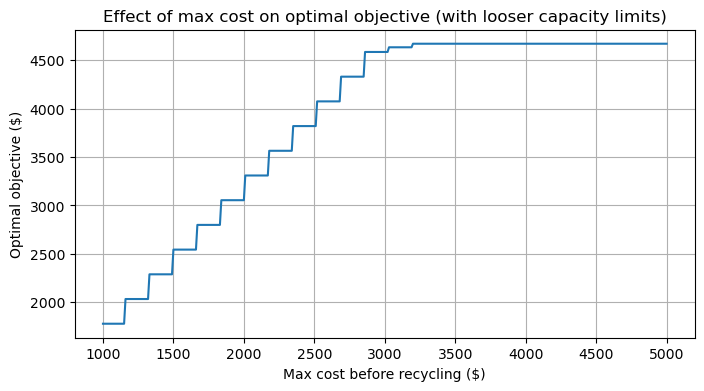

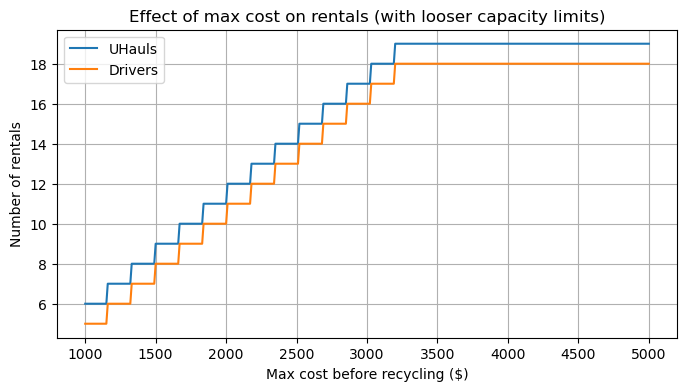

In [ ]:
# Plot results!
using PyPlot

figure(figsize=(8,4))
plot( cmaxes, optimals, "-" )
ylabel("Optimal objective (\$)")
xlabel("Max cost before recycling (\$)");
title("Effect of max cost on optimal objective (with looser capacity limits)")
grid()

figure(figsize=(8,4))
plot( cmaxes, UHauls, "-" )
plot( cmaxes, Drivers, "-" )
ylabel("Number of rentals")
xlabel("Max cost before recycling (\$)");
title("Effect of max cost on rentals (with looser capacity limits)")
legend(["UHauls", "Drivers"])
grid()

Indeed, if we set the capacity limits much higher, we find that the max cost has an impact on the objective value. When the capacity is really high, a low max cost prevents us from purchasing more rentals in order to recycle more bottles; a higher max cost allows us to spend more on the frontend, but get more profit at the end. 

### 4.E Changing the Gas Price

Now, let's look at the cost of gas. We know that with our set gas price, we are able to make a profit. How does the price of gas affect our profit? What is the maximum price of gas where we can still make a profit? Let's investigate.

In [ ]:
# Start with the lowest possible gas price
gas_price = 0

optimals = []
gas_prices = []
distances = []
costs = []

# Keep increasing the cost by 10 cents until we no longer make a profit
while true 
    data = test_parameters(g=gas_price)
    
    # break when the cost of gas is too high
    if data[:obj] < 0
        print("Highest cost we can handle per gallon: ", gas_price - 0.1)
        break
    end
    push!(optimals, data[:obj])
    push!(distances, data[:dist])
    push!(costs, data[:cost])
    push!(gas_prices, gas_price)
    gas_price += 0.1
end

Highest cost we can handle per gallon: 78.19999999999983

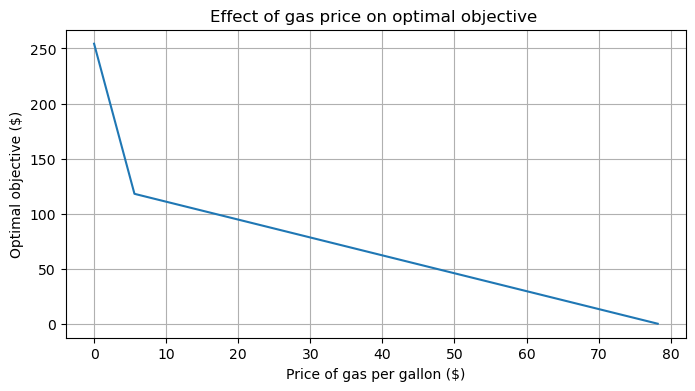

In [ ]:
# Plot data!

using PyPlot

figure(figsize=(8,4))
plot( gas_prices, optimals, "-" )
ylabel("Optimal objective (\$)")
xlabel("Price of gas per gallon (\$)");
title("Effect of gas price on optimal objective ")
grid()

This is surprising - it turns out that we can handle a cost of up to \$78.19 *per gallon* before we stop making any profit on this venture. That is extremely high! It means that no matter the cost of gas, we will still be able to make a profit (since $78.19 is far higher than the cost of gas will ever be).

The graph above has an interesting inflection point where the optimal objective starts to go down at a slower rate. Let's investigate why that might be the case.

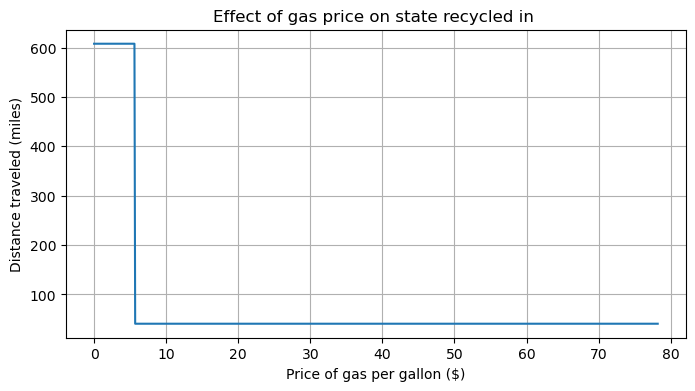

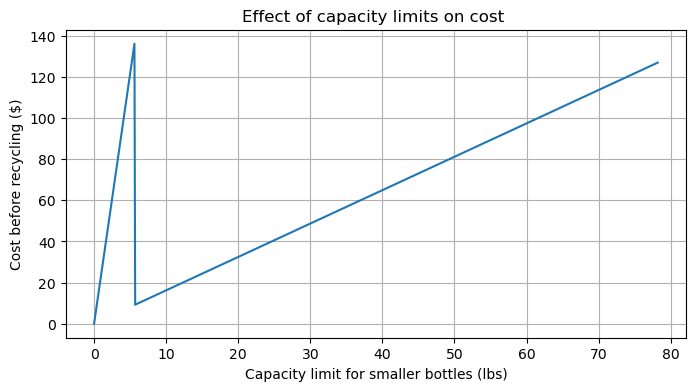

In [ ]:
# Plot more data!

using PyPlot

figure(figsize=(8,4))
plot( gas_prices, distances, "-" )
ylabel("Distance traveled (miles)")
xlabel("Price of gas per gallon (\$)");
title("Effect of gas price on state recycled in ")
grid()

figure(figsize=(8,4))
plot( gas_prices, costs, "-" )
ylabel("Cost before recycling (\$)")
xlabel("Capacity limit for smaller bottles (lbs)");
title("Effect of capacity limits on cost ")
grid()

There it is - when we hit about \$5.00 per gallon, it no longer becomes profitable to travel so far to get to Michigan. Thus, we instead travel to a new state, which turns out to be Connecticut (much closer to New York). This means our distance to travel goes down, as well as our cost. It also means that the cost of gas affects our overall cost less, since we are traveling a shorter distance.

### 4.F Considering the Cost of Getting Caught

An interesting note about this problem is that it is technically illegal. When you purchase a bottle in one state, you are not allowed to recycle that bottle in a different state. Thus, let's attempt to factor in the cost of getting caught and fined. 

We did not have time to develop a more complex model which used expected values and risks. Instead, we define a probability of getting caught for each state, as well as a base fine. We assume that when you recycle in a certain state, your fine is the probability of getting caught times the fine. 

In [ ]:
P = [0.5,0.3,0.2,0.8,0.9,0.7,0.2,0.3] # made-up probabilities
fine = 50 # fine for getting caught

50

In [ ]:
# Then, let's write the model.

using JuMP, Gurobi

m = Model(with_optimizer(Gurobi.Optimizer,GUROBI_ENV,OutputFlag=0))

# Define our decision variables
@variable(m, Ψ[1:8], Bin)      # whether to recycle in each state
@variable(m, X[1:2, 1:8] >= 0, Int) # the number of bottles to recycle in each state
@variable(m, U >= 0, Int)           # the number of UHauls to buy
@variable(m, D >= 0, Int)     # the number of drivers to hire

# We tried our model first without making X, U, or D have to be integers.

# Define expressions as above
@expression(m, revenue, sum(X[1,j]ρ[1,j] + X[2,j]ρ[2,j] for j in 1:8))
@expression(m, rentals, sum( Ψ[j] * (U * (r_1 + 2δ[j] * r_2) + D * 2ϕ[j] * h) for j in 1:8 ))
@expression(m, gas, sum( Ψ[j] * (((U * δ[j] * g) / m_u )) for j in 1:8 ))

# Add the cost of getting caught
@expression(m, getting_caught, sum( Ψ[j] * P[j]*fine for j in 1:8 ))

# Constraints
@constraint(m, rentals + gas <= C_Max)         # max cost constraint
@constraint(m, sum( Ψ[j] for j in 1:8 ) == 1) # can only select one location

# The number of drivers should be zero, unless we are required to hire.
# Then we need to hire enough drivers to close the gap between the number
#   of cars and the number of people available to drive them.
@constraint(m, D >= U - d)

for j in 1:8
    for i in 1:2
        @constraint(m, w[i]X[i,j] <= λ[i]) # weight limits
        @constraint(m, X[i,j] <= M[i]Ψ[j]) # don't recycle somewhere unless we chose that location
    end
    @constraint(m, ν[1]X[1,j] + ν[2]X[2,j] <=  U * v_u) # volume limits - have to convert to ft3
end

# And finally, our objective
@objective(m, Max, revenue - rentals - gas - getting_caught)

# Optimize it!
optimize!(m)

In [ ]:
# Now, print data!
data = extract_recycling_data(value.(X))
println("Recycle ", Int(data[:bottles]), " bottles")
println("Rent ", Int(value(U))," Uhaul(s) and ", Int(value(D)), " drivers")

Recycle 0 bottles
Rent 0 Uhaul(s) and 0 drivers


By considering the cost of getting caught, it no longer becomes profitable to recycle any bottles at all. It is interesting to consider whether the characters in the Seinfeld episode would have been similarly deterred by this potential punishment. (Probably not.)

### 4.G Considering New York as an Option

Finally, we ignored New York recycling centers, since we assumed New York would be the optimal choice no matter what. Let's verify that assumption.

In [ ]:
# setting up new constraints
ρ =[0.05 0.05 0.05 0.05 0.05 0.10 0.10 0.05 0.05; # values in different states (dollars)
     0.10 0 0 0.15 0 0 0 0.15 0.10]
ν = [50.00 102.69] # volumes (in^3)
w = [0.67 102.69] # weights (oz)
λ = [1600 16000] # weight limit (oz)

δ = [2662 40.6 947 272 143 608 2684 222 0.6]   # distance to locations (miles)
ϕ = [40 0.85 14.73 4.52 2.47 9.55 40 3.72 0.5] # time to locations (hours)

C_Max = 1000 # dollars
g = 4.101    # dollars

c = 1           # num existing cars
m_c = 25        # gas mileage of existing car
v_c = 213926.4 # volume of existinc car in in^3

m_u = 18      # gas milesage of UHaul
v_u = 425088 # volume of UHaul in in^3
r_1 = 38      # base price
r_2 = 0.99    # price per mile

d = 2         # num drivers
h = 25        # price to rent driver per hour

M = [2388 906]  # capacity limits

1×2 Matrix{Int64}:
 2388  906

In [ ]:
using JuMP, Gurobi

m = Model(with_optimizer(Gurobi.Optimizer,GUROBI_ENV,OutputFlag=0))

# Define our decision variables
@variable(m, Ψ[1:9], Bin)      # whether to recycle in each state
@variable(m, X[1:2, 1:9] >= 0, Int) # the number of bottles to recycle in each state
@variable(m, U >= 0, Int)           # the number of UHauls to buy
@variable(m, D >= 0, Int)     # the number of drivers to hire

# We tried our model first without making X, U, or D have to be integers.

# Define expressions as above
@expression(m, revenue, sum(X[1,j]ρ[1,j] + X[2,j]ρ[2,j] for j in 1:9))
@expression(m, rentals, sum( Ψ[j] * (U * (r_1 + 2δ[j] * r_2) + D * 2ϕ[j] * h) for j in 1:9 ))
@expression(m, gas, sum( Ψ[j] * ( ((c * δ[j] * g) / m_c ) + ((U * δ[j] * g) / m_u )) for j in 1:9 ))
#@expression(m, getting_caught, sum( Ψ[j] * P[j]*fine for j in 1:9 ))
# Constraints
@constraint(m, rentals + gas <= C_Max)         # max cost constraint
@constraint(m, sum( Ψ[j] for j in 1:9 ) == 1) # can only select one location

# The number of drivers should be zero, unless we are required to hire.
# Then we need to hire enough drivers to close the gap between the number
#   of cars and the number of people available to drive them.
@constraint(m, D >= c + U - d)

for j in 1:9
    for i in 1:2
        @constraint(m, w[i]X[i,j] <= λ[i]) # weight limits
        @constraint(m, X[i,j] <= M[i]Ψ[j]) # don't recycle somewhere unless we chose that location
    end
    @constraint(m, ν[1]X[1,j] + ν[2]X[2,j] <= c * v_c + U * v_u) # volume limits - have to convert to ft3
end

# And finally, our objective
@objective(m, Max, revenue - rentals - gas)

# Optimize it!
optimize!(m)

In [ ]:
# Now, print data!
data = extract_recycling_data(value.(X))
println("Recycle ", Int(data[:bottles]), " bottles in ", data[:state])
println("Rent ", Int(value(U))," Uhaul(s) and ", Int(value(D)), " drivers")
println("Total profit: \$", objective_value(m))

Recycle 2388 bottles in Michigan
Rent 0 Uhaul(s) and 0 drivers
Total profit: $139.06368000000003


This is very surprising! Even with New York as an option, we *still* travel to Michigan to recycle bottles there. The effect of a higher deposit value is clearly a strong pull to make us recycle further away.

## 5. Conclusion ##

In our project, we found that our solved model sent all the recyclables to either Connecticut or Michigan, depending on how we modified our original setup. We found this to be reasonable result, since Connecticut was the closest state to our starting point of New York City, and since Michigan has the highest deposit values for plastic bottles. It was quite fascinating (and unexpected!) that our original setup sent all our bottles to Michigan, the same state at the center of the Seinfeld character's scheme in the episode. 

There is probably no realistic or feasible way we could adjust this problem (add constraints, keep $ costs resonable, etc) to, for example, overcome the fact that it is a whopping 2662 mile drive to the nearest California recycling center and only 40 miles to one in Connecticut. This is despite the fact that California accepts glass bottles for 10 cents each, and Connecticut doesn't accept them at all. One could imagine introducing much more variability for money earned per bottle by state, factoring in the effort of collecting thousands of bottles, or even starting near the geographical center of the United States (Kansas or Nebraska). However, these changes are complex and would depart far from the canonical description of the problem.


Our project was a good model for what a real-life optimization problem might look like. Oftentimes real-world problem solutions suggest investment/flow/scheduling/etc. across several different variables, such as the problems we worked in the homeworks for this class. Other times the solution is simple and "sends" our variables entirely to a single result, as our problem did.